### What is CNN 

![alt text](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

# Important Terms of CNN 

### Convolutional Layer 

![alt text](https://adeshpande3.github.io/assets/Cover.png)

### Activation Function 

![alt text](https://isaacchanghau.github.io/img/deeplearning/activationfunction/intro.png)

![alt text](https://miro.medium.com/max/1192/1*4ZEDRpFuCIpUjNgjDdT2Lg.png)

### Filter or Kernel Size and  Number of Filters 

Ogni filtro estrae diverse feature dall'immagine (per questo motivo ne usiamo diversi)
I filtri rappresentano la "depth" della nostro livello convoluzionale

![alt text](https://i2.wp.com/i.stack.imgur.com/qmf0m.jpg)

### Stride Size 
È la dimensione del rettangolo blu scuro
### Padding 

<img src = "https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif">

### Max Pooling

![alt text](https://qph.fs.quoracdn.net/main-qimg-98ecf7ba49710bf56042d035a74505b6)

### Flattening and Dense Layer 

In between the convolutional layer and the fully connected layer, there is a 'Flatten' layer. Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.

### Dataset utilizzato:
https://www.kaggle.com/c/cifar-10

Utilizziamo google colab:
`colab.reasearch.google.com`

In questo modo abbiamo accesso gratuito ad una GPU così da poter velocizzare la fase di apprendimento della nostra CNN

### Download data and Model Building

Per selezionare se usare GPU o TPU (leggermente più veloce: Tensor Processing Unit) andare su `runtime -> change runtime type`

Nota:

In `colab` fa sempre fatto `pip install`, ad ogni esecuzione.

In [0]:
!pip install tensorflow-gpu

In [0]:
!pip install mlxtend==0.17.0

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [0]:
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

##### Importiamo il dataset cifar10

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['ariplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

##### Normalizziamo i colori dei vari pixel

In questo caso abbiamo le shape che sono:

`(numero di esempi, pixel immagine, pixel immagine, quanti array 32x32 abbiamo -uno per ogni colore RGB -)`

(<matplotlib.image.AxesImage at 0x7f114e8f92e8>, 'cat')

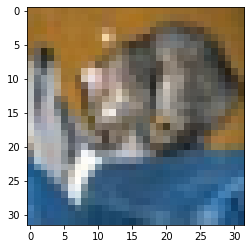

In [0]:
plt.imshow(X_test[0]), class_names[y_test[0][0]]

In [0]:
print(X_train.max())
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, X_test.shape

255


((50000, 32, 32, 3), (10000, 32, 32, 3))

### Build CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

# copiare righe 4-5-6 per aggiungere nuovi livello convoluzionali

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 203s 4ms/sample - loss: 1.3982 - sparse_categorical_accuracy: 0.4986 - val_loss: 1.1353 - val_sparse_categorical_accuracy: 0.5942
Epoch 2/10
50000/50000 [==============================] - 204s 4ms/sample - loss: 1.0995 - sparse_categorical_accuracy: 0.6071 - val_loss: 0.9960 - val_sparse_categorical_accuracy: 0.6504
Epoch 3/10
50000/50000 [==============================] - 203s 4ms/sample - loss: 0.9735 - sparse_categorical_accuracy: 0.6556 - val_loss: 1.0044 - val_sparse_categorical_accuracy: 0.6442
Epoch 4/10
50000/50000 [==============================] - 200s 4ms/sample - loss: 0.8964 - sparse_categorical_accuracy: 0.6827 - val_loss: 0.9323 - val_sparse_categorical_accuracy: 0.6703
Epoch 5/10
50000/50000 [==============================] - 200s 4ms/sample - loss: 0.8285 - sparse_categorical_accuracy: 0.7080 - val_loss: 0.8847 - val_sparse_categorical_accuracy: 0.6861
Epoch 6/10

In [1]:
model.save('model.h5')

NameError: ignored

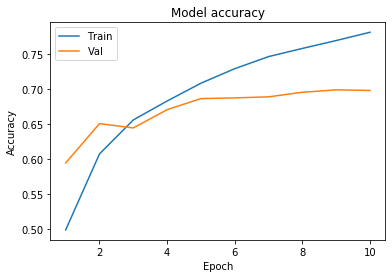

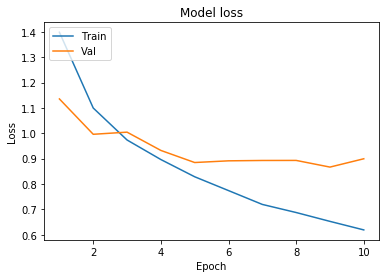

In [0]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(X_test)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1146e063c8>)

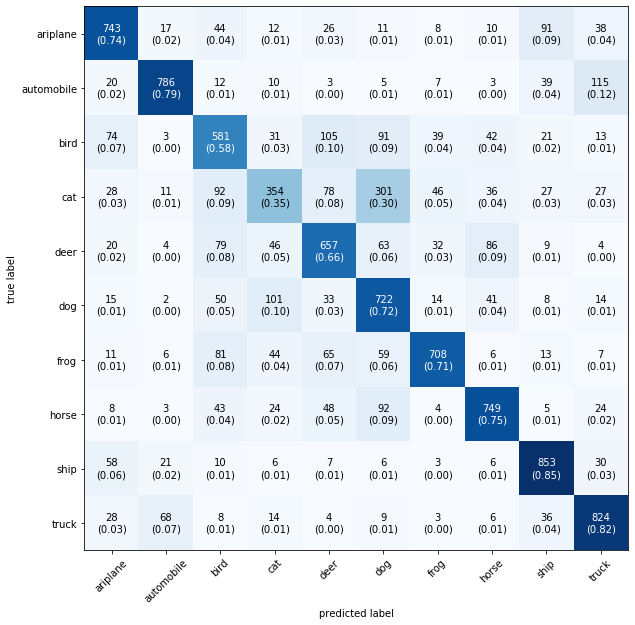

In [0]:
mat = confusion_matrix(y_test, y_pred)
# show_normed = per mostrare le distribuzione di probabilità per ogni classe
plot_confusion_matrix(conf_mat=mat, figsize=(10,10), show_normed=True, class_names = class_names)